In [11]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [7]:
csvPath = os.path.expanduser("~/Desktop")
df = pd.read_csv(f"{csvPath}/NBA2017_Output.csv", sep=";")

df = df.drop(df.columns[[0,]], axis=1)

In [96]:
categories = ["MIN" , "PTS", "AST", "REB", "BLK", "STL", "TOV", "FG%", "3PM", "FT%"]
TeamA = ["Kevin Durant", "Jimmy Butler"]
TeamB = ["Anthony Davis", "Andre Drummond"]

DfTeamA = pd.DataFrame()
for Player in TeamA:
    DfTeamA = DfTeamA.append(df.loc[df['PLAYER'] == Player])

DfTeamB = pd.DataFrame()
for Player in TeamB:
    DfTeamB = DfTeamB.append(df.loc[df['PLAYER'] == Player])
    
DfTeamA = DfTeamA.drop(["FGM", "FGA", "3PA" , "3P%", "FTM", "FTA", "OREB", "DREB", "PF", "FP", "+/-"], axis=1)
DfTeamB = DfTeamB.drop(["FGM", "FGA", "3PA" , "3P%", "FTM", "FTA", "OREB", "DREB", "PF", "FP", "+/-"], axis=1)

AnalysisTeamA = DfTeamA.describe()
AnalysisTeamB = DfTeamB.describe()

MeanTeamA = AnalysisTeamA.loc["mean"]
MeanTeamB = AnalysisTeamB.loc["mean"]

MeanTeamAnalysis = pd.DataFrame({'MeanTeamA': MeanTeamA, 'MeanTeamB': MeanTeamB})
MeanTeamAnalysis = MeanTeamAnalysis.transpose()
MeanTeamAnalysis["Team"] = ["TeamA", "TeamB"]

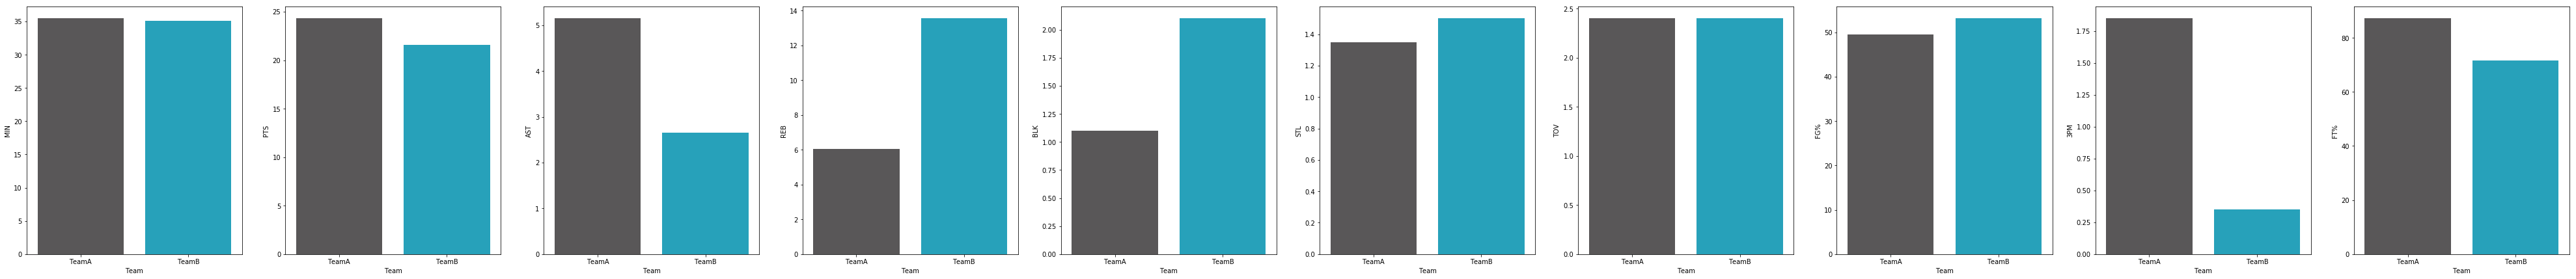

In [119]:
height = 7
width = len(categories) * height
fig, axs = plt.subplots(ncols=len(categories), figsize= (width, height))
winRateA = 0
i = 0
for categorie in categories:
    sns.barplot(x="Team", y=categorie, data=MeanTeamAnalysis, palette=["#595758", "#0eb1d2"], ax=axs[i])
    i += 1
    if MeanTeamAnalysis.loc["MeanTeamA"][categorie] > MeanTeamAnalysis.loc["MeanTeamB"][categorie]:
        winRateA = winRateA + 1

In [122]:
# Percent of categories won by Team A.
winRateA / len(categories)

0.5

In [97]:
MeanTeamAnalysis

,GP,W,L,MIN,PTS,FG%,3PM,FT%,REB,AST,TOV,STL,BLK,DD2,TD3,FantasyPoints,FantasyPoints%,Team
MeanTeamA,63.5,43.0,20.5,35.45,24.30,49.50,1.85,87.15,6.05,5.15,2.4,1.35,1.1,9.0,1.0,5322.5,0.986,TeamA
MeanTeamB,76.5,41.0,35.5,35.05,21.55,53.15,0.35,71.65,13.55,2.65,2.4,1.50,2.1,56.0,0.5,4995.5,0.925,TeamB


In [78]:
df.to_csv(path_or_buf=f"{csvPath}/NBA2017_PlayerAnalysis_{time.time()}.csv", sep=";")

In [ ]:
# Typical Statistics for all NBA Players
df.describe()